In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

In [4]:
import pandas as pd

df = pd.read_csv(
    'housing.data', 
    header=None, # especificamos que el dataset no tiene headers.
    sep='\s+') # especificamos que la separacion esta hecha por espacios y no por comas.

df.columns = ["CRIM","ZN","INDUS" , "CHAS" ,"NOX","RM" ,"AGE","DIS", "RAD","TAX", "PTRATIO", "B" , "LSTAT" , "MEDV"]

df.head()

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\guido\AppData\Local\Temp\ipykernel_15492\3442626613.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+') # especificamos que la separacion esta hecha por espacios y no por comas.


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

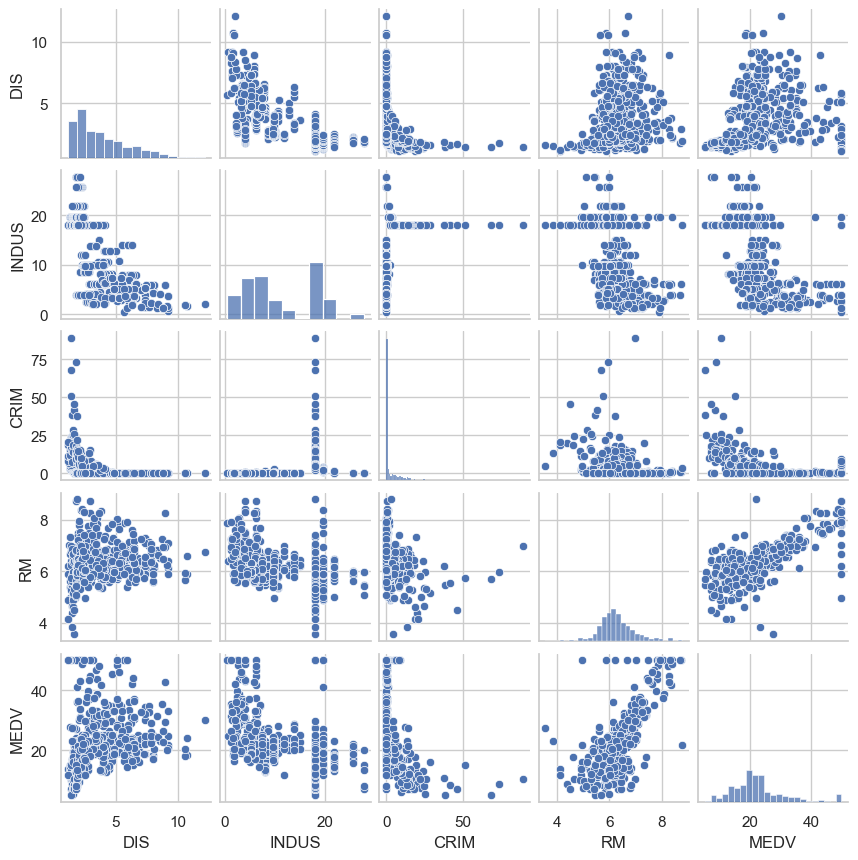

In [5]:
# Configuramos la apariencia de los graficos
sns.set(style='whitegrid', context='notebook')

# Seleccionamos los features que mas nos interesa para ver la correlacion entre las variables
cols = ["DIS", "INDUS", "CRIM", "RM","MEDV"]

# Graficamos con un pairplot las variables de interes para ver sus relaciones
sns.pairplot(df[cols], height=1.75);

<Axes: >

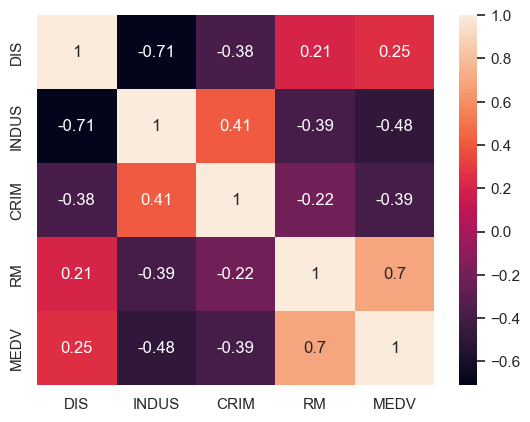

In [6]:
sns.heatmap(
    data=df[cols].corr(), 
    cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

In [7]:
# Guardamos los datos de interes en una variable x e y
x = df['RM'].values.reshape(-1,1) # variable independiente
y = df['MEDV'].values.reshape(-1,1) # variable dependiente

In [9]:
# instanciamos el modelo de escalamiento
sc_x = StandardScaler()
sc_y = StandardScaler()

In [10]:
# estandarizamos los datos z=(x-u)/std
x_standard = sc_x.fit_transform(x)
y_standard = sc_y.fit_transform(y)

In [17]:
# Instanciamos y ajustamos el modelo de regresión lineal
slr = LinearRegression() # Standar Linear Regression (slr)
slr.fit(x_standard,y_standard)

LinearRegression()

Text(0, 0.5, 'Mediana del precio de las casas x1000 (MEDV)')

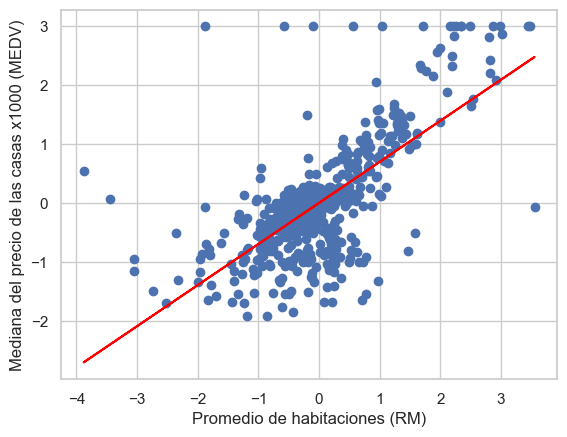

In [18]:
# Graficamos los datos estandarizados
plt.scatter(x_standard, y_standard)
# Graficamos la linea de regresion ajustada
plt.plot(x_standard, slr.predict(x_standard), color='red')

plt.xlabel("Promedio de habitaciones (RM)")
plt.ylabel("Mediana del precio de las casas x1000 (MEDV)")

In [21]:
# Representamos el numero de habitaciones de la casa que queremos predecir
num_habitaciones = 10

# Estandarizamos sc_x para predecir el predio de la casa
num_habitaciones_standard = sc_x.transform(np.array([num_habitaciones]).reshape(-1,1))

# Usamos la transformada inversa en el resultado para volver a la escala original 
result = sc_y.inverse_transform(slr.predict(num_habitaciones_standard))
print("El precio de una casa con 5 habitaciones en Boston es de", result*1000)

El precio de una casa con 5 habitaciones en Boston es de [[56350.46903536]]
